In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Looking at the data

In [2]:
columns=['age', 'work-class', 'fnlwgt', 'education', 'edu-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'cap-gain', 'cap-loss', 'hours/week', 'country', 'income']

data= pd.read_csv('adult.data', sep=', ', names=columns, na_values='?', engine='python')

data

,age,work-class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,gender,cap-gain,cap-loss,hours/week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  cap-gain        32561 non-null  int64 
 11  cap-loss        32561 non-null  int64 
 12  hours/week      32561 non-null  int64 
 13  country         31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


work-class, occupation, country have some null values

# Exploring numerical features

In [4]:
data.describe()

,age,fnlwgt,edu-num,cap-gain,cap-loss,hours/week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


this shows us the details of all the numerical features such as the mean and maximum values. 
Now we split the features into numerical and categorical to handle them separately

In [5]:
num_data= data[['age', 'fnlwgt', 'edu-num', 'cap-gain', 'cap-loss', 'hours/week']]
cat_data= data.select_dtypes(include=['object'])

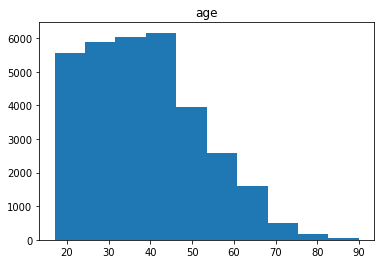

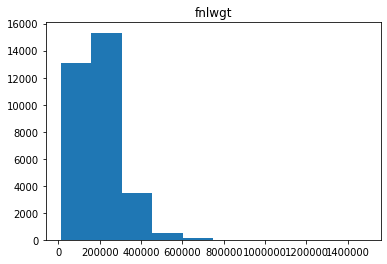

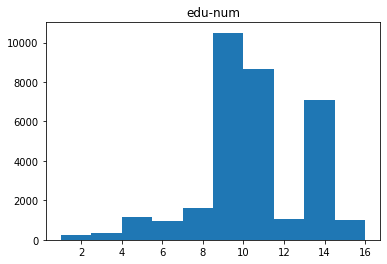

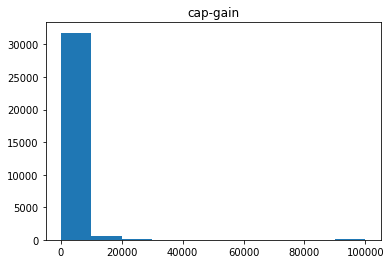

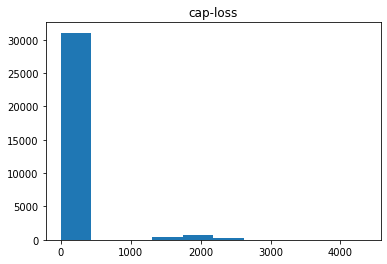

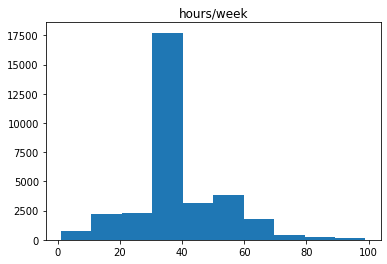

In [6]:
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

observations:
   * maximum people are below the age of 50
   * maxmum of the fnlwgts are below 400k
   * Very few people invest in capital,there are a few of outliers who earn more than 90000 via capital gains. However, for people who suffered a capital loss the average loss is around 2000
   * most people have education till numbers 9, 10 and 14
   * most people work around 40 hours/week, with some exceptions of 100 hours/week also

                 age    fnlwgt   edu-num  cap-gain  cap-loss  hours/week
age         1.000000 -0.076646  0.036527  0.077674  0.057775    0.068756
fnlwgt     -0.076646  1.000000 -0.043195  0.000432 -0.010252   -0.018768
edu-num     0.036527 -0.043195  1.000000  0.122630  0.079923    0.148123
cap-gain    0.077674  0.000432  0.122630  1.000000 -0.031615    0.078409
cap-loss    0.057775 -0.010252  0.079923 -0.031615  1.000000    0.054256
hours/week  0.068756 -0.018768  0.148123  0.078409  0.054256    1.000000


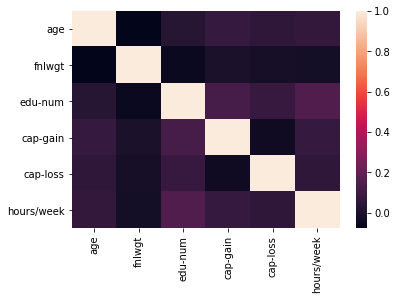

In [7]:
sns.heatmap(num_data.corr())

print(num_data.corr())

* fnlwgt does not correlate to anything much, so it seems useless
* edu-num, hours/week and age have some correlation worth exploring and can be improved
* capital gain and loss have a slight negative correlation

In [8]:
pd.pivot_table(data, index= ['income'], values=num_data.columns)

,age,cap-gain,cap-loss,edu-num,fnlwgt,hours/week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


observation:
   * people with more income have high values in all attributes
   * but there is no significant difference in fnlwgt values

# Exploring categorical features

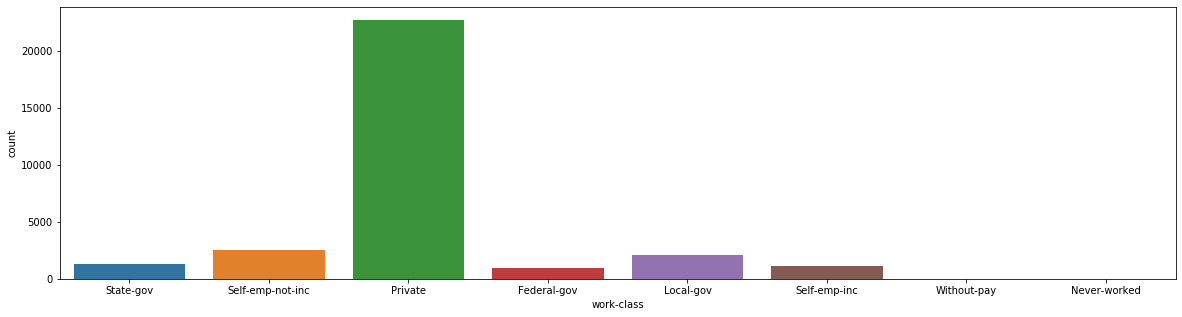

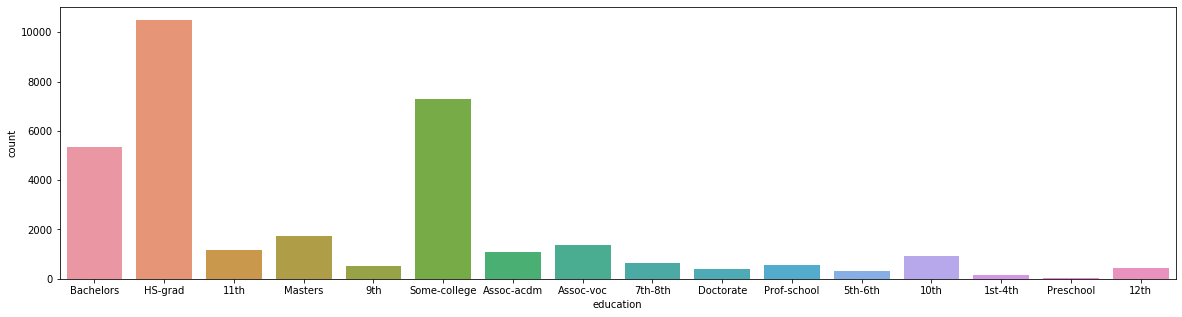

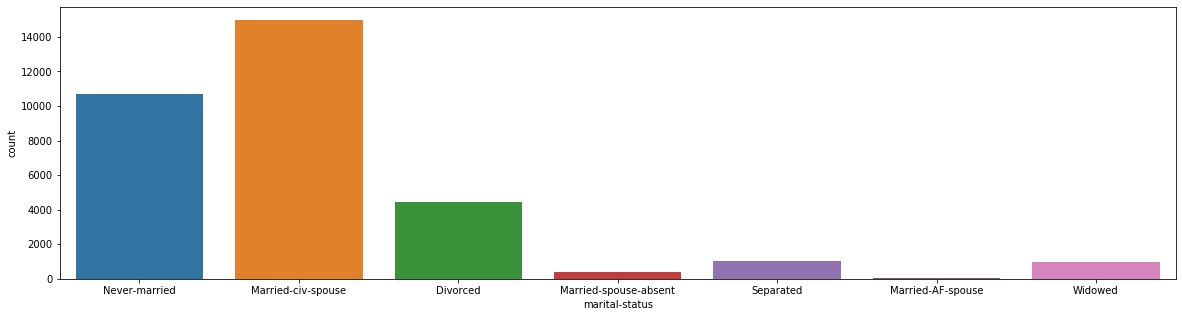

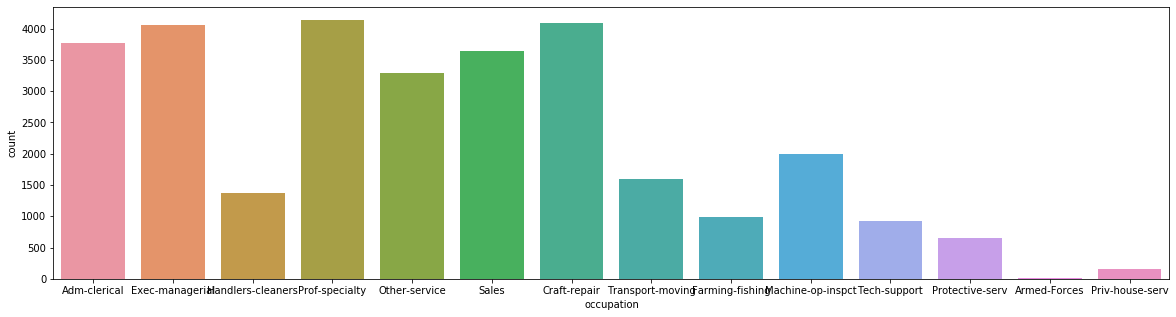

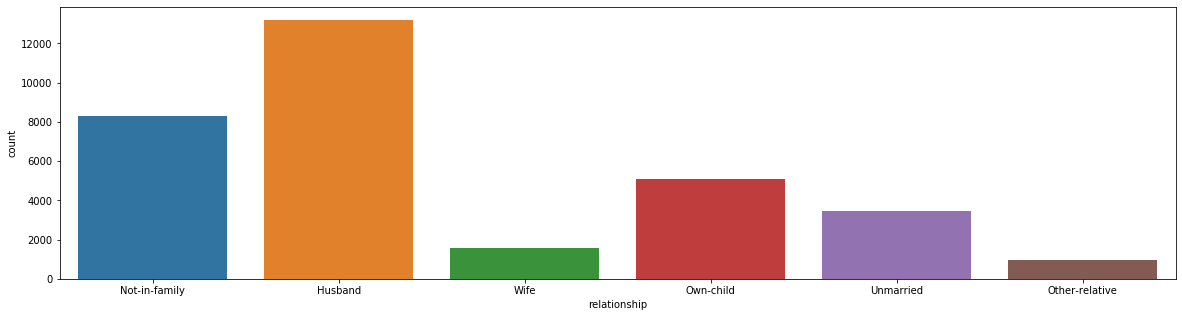

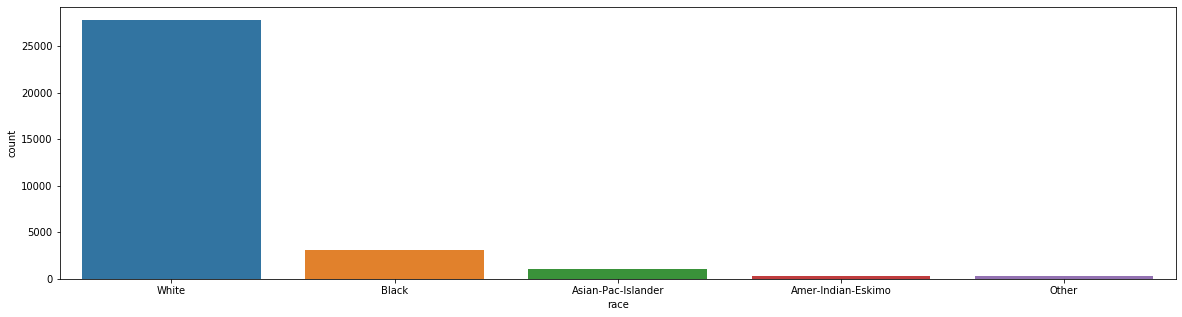

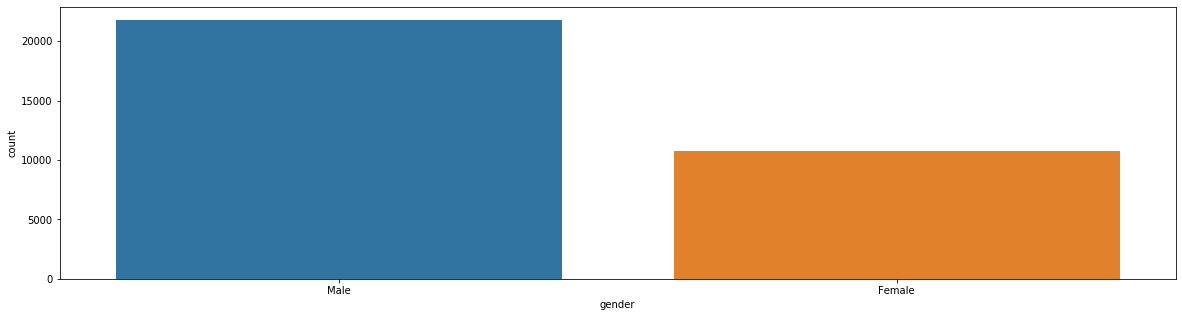

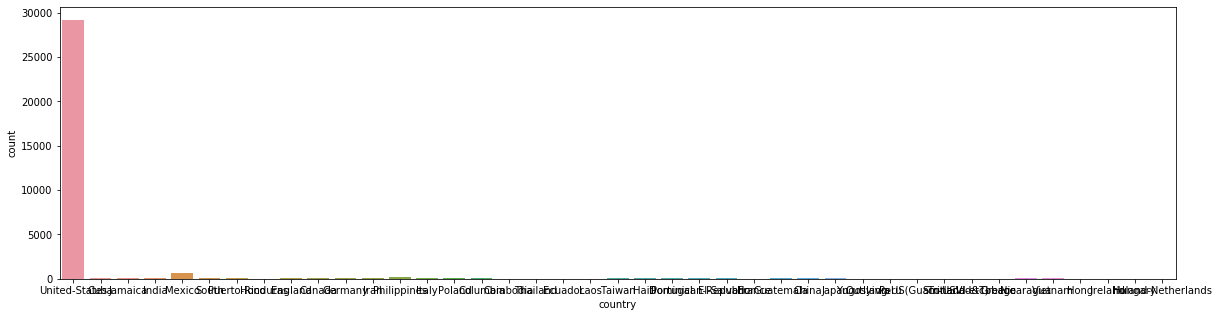

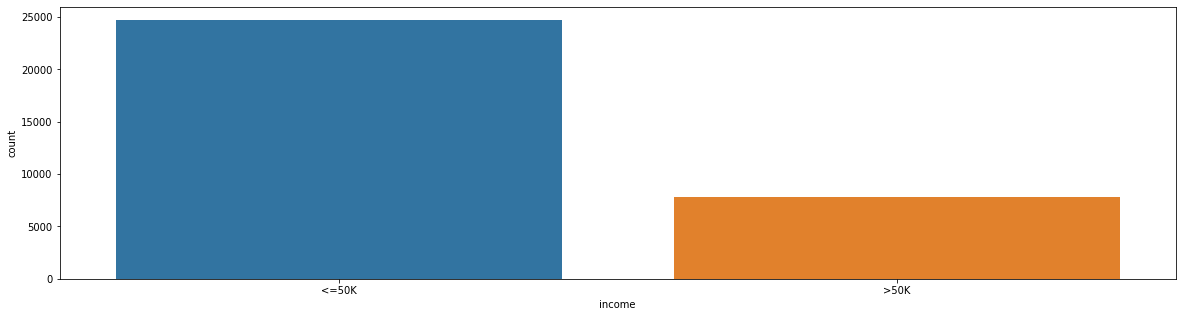

In [9]:
for i in cat_data.columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data= cat_data, x= i)

Observations:
   * most people are from private working classs, with others almost evenly distributed between various government and self-employment jobs
   * most people have a bachelor degree or high school degree or have studied in some college. The distribution looks very similar to that of edu-num, which can be explored further
   * most people have either never married, or have married, with very few who have separated or widowed
   * the occupations are mostly evenly distributed and it if difficult to see a trend when there are so many categories
   * most poeple are either husbands or not in a family
   * most people are white, with few significant black people
   * there are more males than females, which can also be derived as most people are husbands
   * a very vast majority are from the US
   * a lot more people have an income lower than 50k, this shows the data is very imbalanced

# Some feature engineering

Most of the categorical features are very messy, with too many categories. So here we can use feature engineering to group similar categories together to enhance the features

## work-class

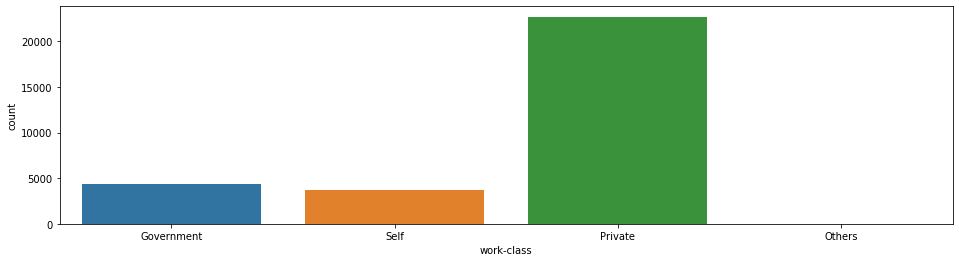

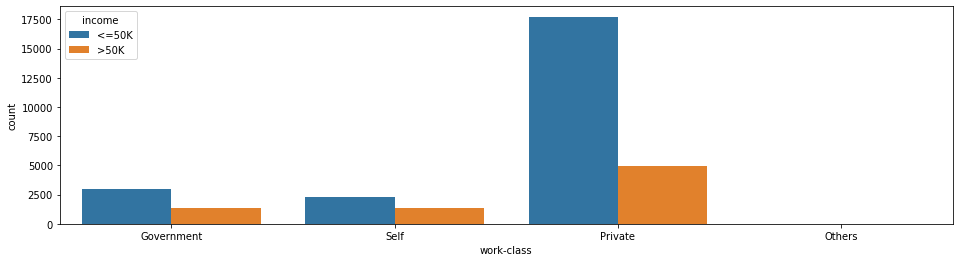

In [10]:
data['work-class'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
data['work-class'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
data['work-class'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='work-class')
plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='work-class', hue='income')

* more people have a lower income in all working classes

## education

In [11]:
data.groupby('education').nunique()['edu-num']

education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: edu-num, dtype: int64

This implies education and edu-num are exactly the same. It has just been encoded, so we can use just one of the two and drop the other

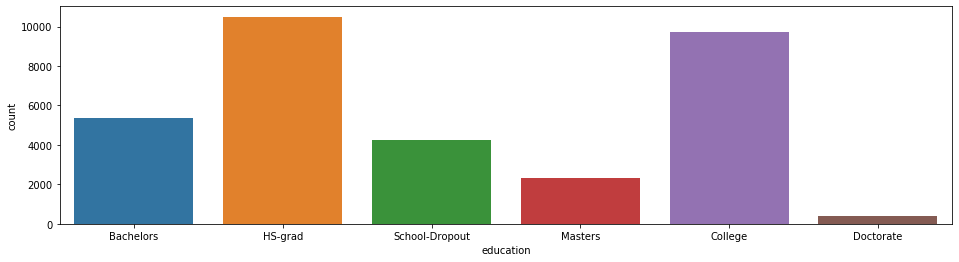

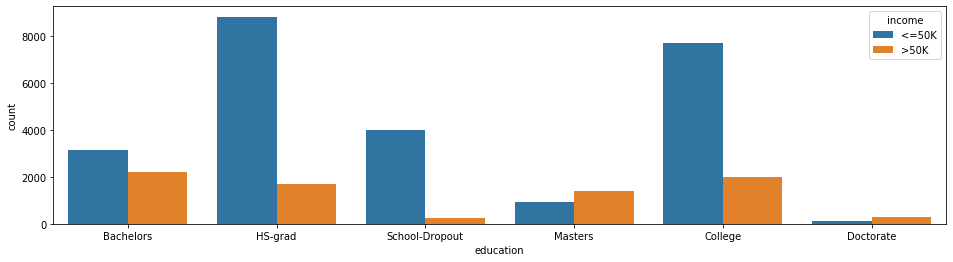

In [12]:
data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School-Dropout', inplace=True)
data['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'College', inplace=True)
data['education'].replace('Prof-school', 'Masters', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='education')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='education', hue='income')

* Masters and Doctorates are very highly paid compared to all other education levels
* most lower income people are either dropouts or high school grads

## marital-status

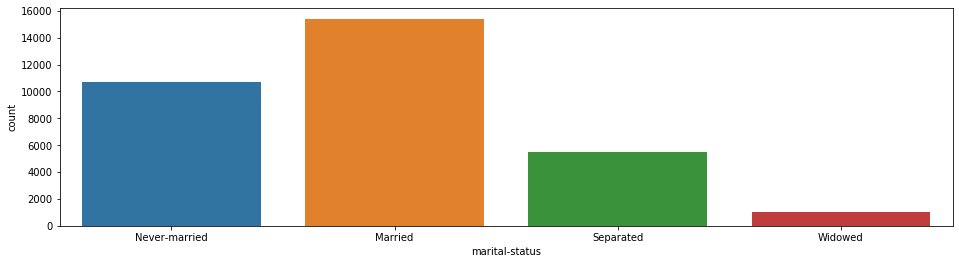

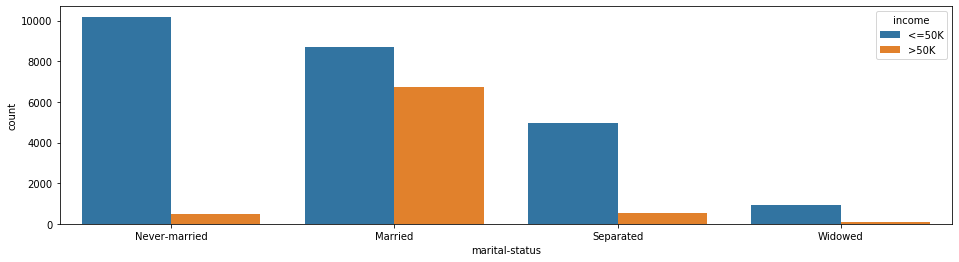

In [13]:
data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
data['marital-status'].replace('Divorced', 'Separated',inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='marital-status')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='marital-status', hue='income')

* almost all people with income higher than 50k are married
* single people have comparatively much lower income

## occupation

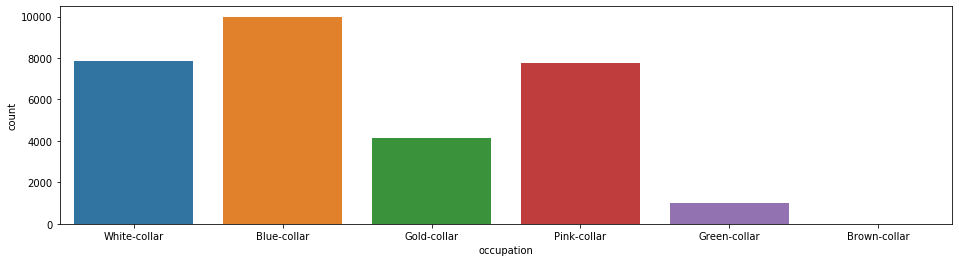

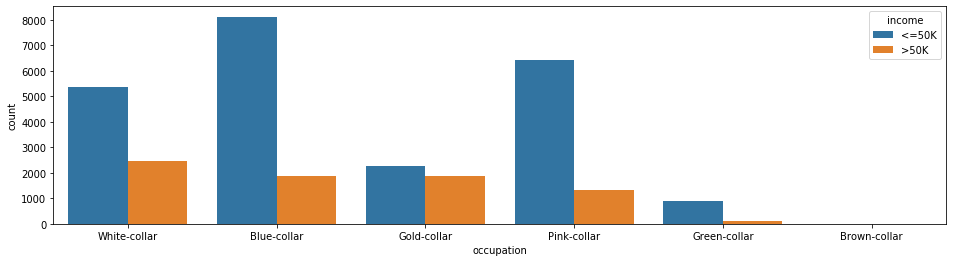

In [14]:
data['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
data['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
data['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
data['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
data['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
data['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='occupation')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='occupation', hue='income')

* blue and pink collar jobs have the lowest income
* gold collar people are paid the most

## country

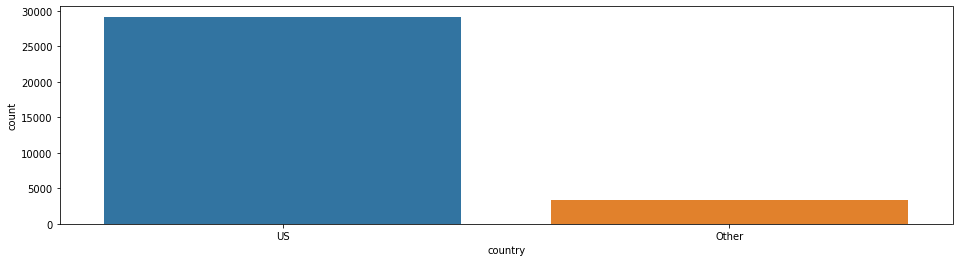

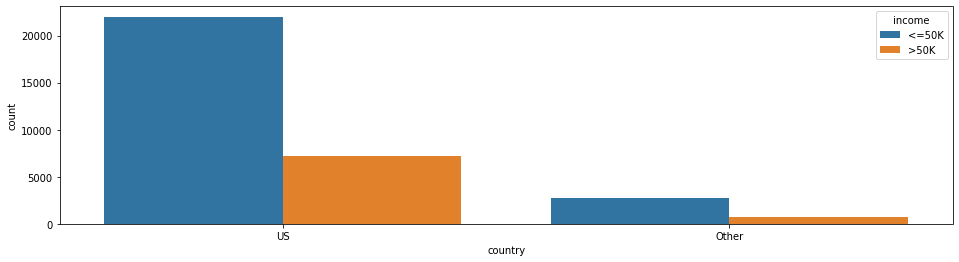

In [15]:
data['country']= data['country'].map(lambda x: 'US' if x=='United-States' else 'Other')

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='country')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='country', hue='income')

* this shows US members are more in this dataset, therefore more US people are shown to have a higher income

## age

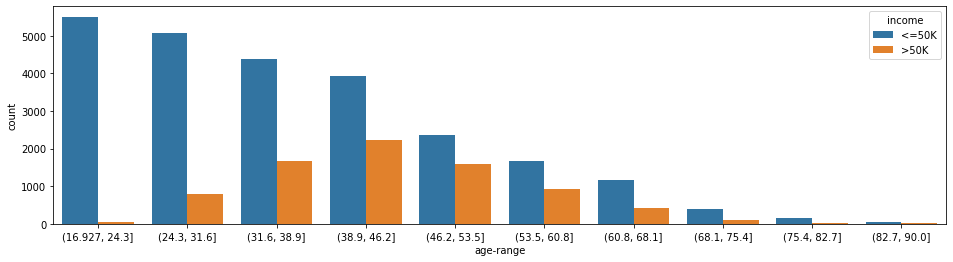

In [16]:
data['age-range']= pd.cut(data['age'], 10)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='age-range', hue='income')

* higher income people have age in the range 30-50
* younger people are paid much lower than middle-aged people

## relationship

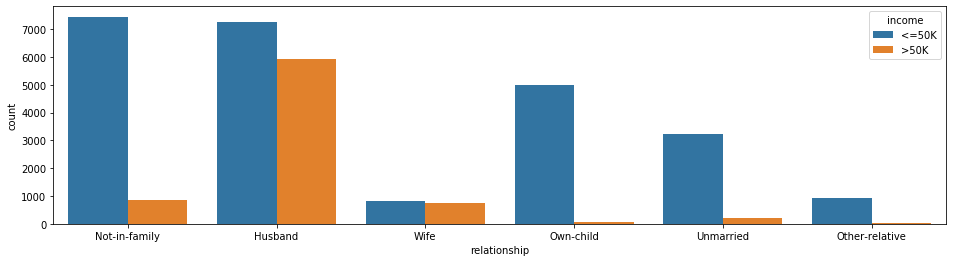

In [18]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='relationship', hue='income')

* husbands and wives are the people with higher income, which is consistent with married people earning more

## gender

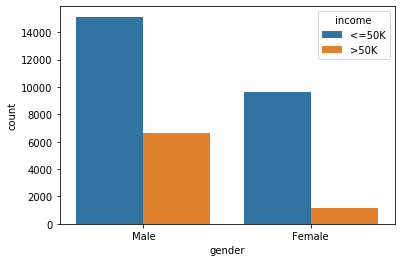

In [19]:
sns.countplot(data=data, x='gender', hue='income')

* more males are paid higher than females

## race

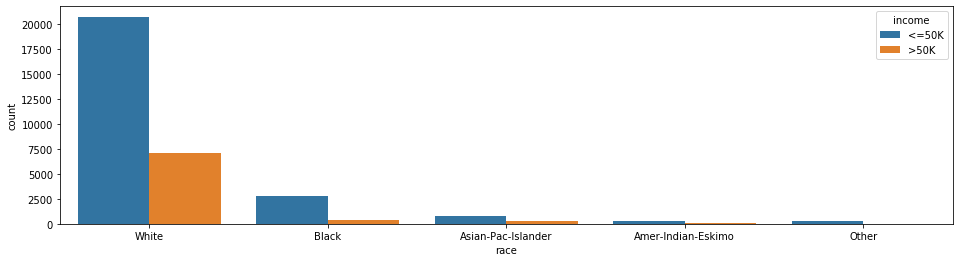

In [21]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='race', hue='income')

* most people with highr income are white, which is also because there are more white people in the dataset

## hours/week

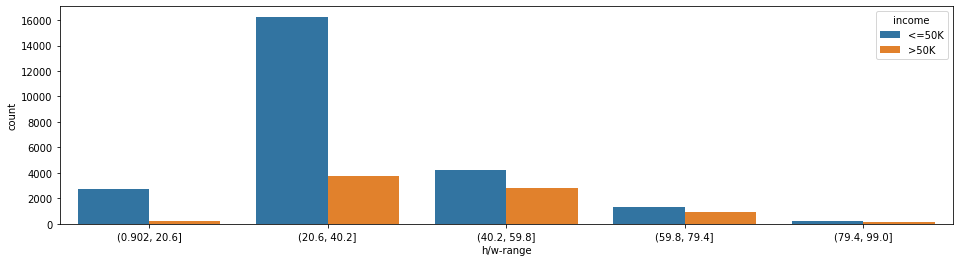

In [22]:
data['h/w-range']= pd.cut(data['hours/week'], 5)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='h/w-range', hue='income')

* people with higher income work 20-60 hours per week

# Processing data

* we remove outliers in capital gain to generalize the data better
* we handle the missing values by removing records with any null attributes. This will not make a significant difference in training as null records are just around 5% of the entire training data
* we remove duplicates to avoid any over fitting
* we drop fnlwgt as it is a useless feature
* out of education and edu-num, we use only edu-num
* we combine capital gain and loss to make it a single feature
* all other features remain as they are

In [23]:
outliers= data[data['cap-gain'] > 40000].index
data= data.drop(outliers)
data= data.dropna(how='any', axis=0)
data= data.drop_duplicates()
data= data.drop('fnlwgt', axis=1)
data= data.drop(columns='education')

data['cap-gain']= data.apply(lambda x: x['cap-gain'] - x['cap-loss'], axis=1)
data= data.drop(columns='cap-loss')
data= data.drop(columns='age-range')
data= data.drop(columns='h/w-range')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30521 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30521 non-null  int64 
 1   work-class      30521 non-null  object
 2   edu-num         30521 non-null  int64 
 3   marital-status  30521 non-null  object
 4   occupation      30521 non-null  object
 5   relationship    30521 non-null  object
 6   race            30521 non-null  object
 7   gender          30521 non-null  object
 8   cap-gain        30521 non-null  int64 
 9   hours/week      30521 non-null  int64 
 10  country         30521 non-null  object
 11  income          30521 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [24]:
data.describe()

,age,edu-num,cap-gain,hours/week
count,30521.000000,30521.000000,30521.000000,30521.000000
mean,38.411749,10.117591,513.143016,40.908620
std,13.114241,2.553523,2612.499333,11.966234
min,17.000000,1.000000,-4356.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,34095.000000,99.000000


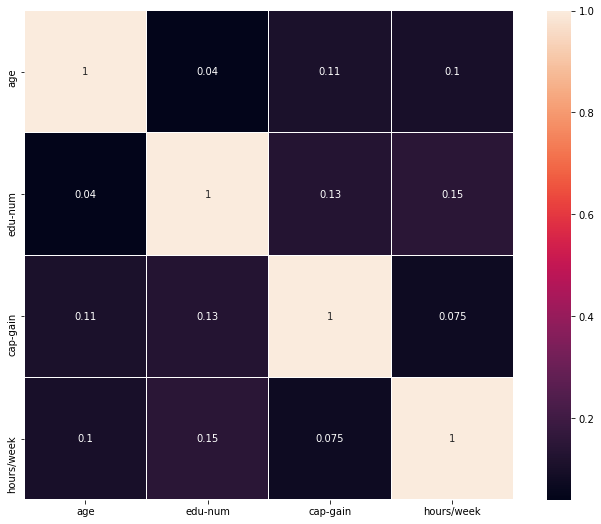

In [25]:
correlation= data.corr()

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, square=True, ax = ax, annot=True, linewidth = 0.1)

Now the correlations have greatly improved and features are more refined. The data is ready for model building

# Model Building

In [26]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(6)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler

model = []
accuracy = []
f1 = []
auc = []

In [27]:
data = pd.get_dummies(data, drop_first=True)
data

,age,edu-num,cap-gain,hours/week,work-class_Others,work-class_Private,work-class_Self,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,country_US,income_>50K
0,39,13,2174,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
1,50,13,0,13,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,40,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,53,7,0,40,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,28,13,0,40,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
32557,40,9,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
32558,58,9,0,40,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
32559,22,9,0,20,0,1,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0


In [28]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

In [29]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent', random_state = 0)
model.append("dummy")
accuracy.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(logreg, param_grid, cv=6).fit(x_scaled, y)

print("Logistic Regression: ", grid.best_score_, grid.best_params_)

Logistic Regression:  0.8358508021508463 {'C': 0.01}


In [31]:
logreg = grid.best_estimator_

model.append("Logistic Regression")
accuracy.append(cross_val_score(logreg, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(logreg, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(logreg, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [32]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {'C': [0.5, 1, 3, 6, 10], 'kernel': ['rbf']}
grid1 = GridSearchCV(svc, param_grid, cv=cv).fit(x_scaled, y)

print("SVC: ", grid1.best_score_, grid1.best_params_)

SVC:  0.845352383792685 {'C': 3, 'kernel': 'rbf'}


In [33]:
svc = grid1.best_estimator_

model.append("SVC")
accuracy.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {'max_depth': [5, 10, 50, 100, None],
              'criterion': ['gini','entropy']}
grid2 = GridSearchCV(dtc, param_grid, cv=cv).fit(x_scaled, y)

print("DTC: ", grid2.best_score_, grid2.best_params_)

DTC:  0.8504964206114177 {'criterion': 'gini', 'max_depth': 10}


In [35]:
dtc = grid2.best_estimator_

model.append("Decision Tree")
accuracy.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

#param_grid = {'n_estimators': [200, 400, 600]}
#OUTPUT:
#RFC:  0.8409292416037498 {'n_estimators': 400}

rfc_ = RandomForestClassifier(n_estimators=400, random_state=0)
param_grid= {'criterion': ['gini','entropy'], 'max_depth': [10, 15, 20, 25, 30, None]}
grid3 = GridSearchCV(rfc_, param_grid, cv=cv).fit(x_scaled, y)

print("RFC: ", grid3.best_score_, grid3.best_params_)

RFC:  0.8559680384227021 {'criterion': 'gini', 'max_depth': 15}


In [37]:
rfc = grid3.best_estimator_

model.append("Random Forest")
accuracy.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0, activation='relu', solver='adam')

param_grid = {'hidden_layer_sizes': [(50,50), (100,)], 'alpha': [0.0001, 0.05]}
grid4 = GridSearchCV(mlp, param_grid, cv=cv).fit(x_scaled, y)

print("Grid MLP: ", grid4.best_score_, grid4.best_params_)

Grid MLP:  0.8494480158494264 {'alpha': 0.05, 'hidden_layer_sizes': (100,)}


In [39]:
mlp = grid4.best_estimator_

model.append("MLP")
accuracy.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [40]:
models = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'F1 Score': f1, 'AUC': auc})
print("model evaluation: ")
models

model evaluation: 


,Model,Accuracy,F1 Score,AUC
0,dummy,0.754529,0.000000,0.500000
1,Logistic Regression,0.835752,0.621240,0.890407
2,SVC,0.845352,0.635709,0.888166
3,Decision Tree,0.850464,0.651659,0.893764
4,Random Forest,0.855968,0.662481,0.911514
5,MLP,0.849448,0.664784,0.905750


Random Forest Classifier gives best results on the training data

# Prediction on test data

In [54]:
test= pd.read_csv('adult.test', sep=', ', names=columns, na_values='?', engine='python', skiprows=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   work-class      15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   edu-num         16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   gender          16281 non-null  object
 10  cap-gain        16281 non-null  int64 
 11  cap-loss        16281 non-null  int64 
 12  hours/week      16281 non-null  int64 
 13  country         16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [55]:
test= test.dropna(how='any', axis=0)
test= test.drop_duplicates()
test= test.drop('fnlwgt', axis=1)
test= test.drop(columns='education')

test['cap-gain']= test.apply(lambda x: x['cap-gain'] - x['cap-loss'], axis=1)
test= test.drop(columns='cap-loss')

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15055 non-null  int64 
 1   work-class      15055 non-null  object
 2   edu-num         15055 non-null  int64 
 3   marital-status  15055 non-null  object
 4   occupation      15055 non-null  object
 5   relationship    15055 non-null  object
 6   race            15055 non-null  object
 7   gender          15055 non-null  object
 8   cap-gain        15055 non-null  int64 
 9   hours/week      15055 non-null  int64 
 10  country         15055 non-null  object
 11  income          15055 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


In [56]:
test['work-class'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
test['work-class'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
test['work-class'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
test['marital-status'].replace('Divorced', 'Separated',inplace=True)

test['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
test['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
test['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
test['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
test['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
test['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

test['country']= test['country'].map(lambda x: 'US' if x=='United-States' else 'Other')

In [57]:
test = pd.get_dummies(test, drop_first=True)
test

,age,edu-num,cap-gain,hours/week,work-class_Others,work-class_Private,work-class_Self,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,country_US,income_>50K.
0,25,7,0,40,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,38,9,0,50,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,28,12,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,44,10,7688,40,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
5,34,6,0,30,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,13,0,40,0,1,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
16276,39,13,0,36,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
16278,38,13,0,50,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
16279,44,13,5455,40,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [58]:
Xtest = test[test.columns[:-1]]
ytest = test[test.columns[-1]]

scaler = StandardScaler().fit(Xtest)
xtest_scaled = scaler.transform(Xtest)

In [59]:
xtest_scaled.shape

(15055, 26)

In [60]:
y_pred= rfc.predict(xtest_scaled)

In [64]:
accuracy_score(ytest, y_pred)

0.832879442045832

Random Forest Classifier gives 83.3% accuracy on the test data compared to 85.6% on training data. This is pretty good as there is no overfitting.